In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
df= pd.read_csv("train.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
pd.isnull(df).sum()[pd.isnull(df).sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
pd.isnull(df).sum()[pd.isnull(df).sum() > 1000]

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [8]:
df=df.drop(["Id","Alley","PoolQC","Fence","MiscFeature"],axis=1)

In [9]:
pd.isnull(df).sum()[pd.isnull(df).sum() > 0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [10]:
df["FireplaceQu"]=df["FireplaceQu"].fillna("QUNA")

In [11]:
df["FireplaceQu"]

0       QUNA
1         TA
2         TA
3         Gd
4         TA
        ... 
1455      TA
1456      TA
1457      Gd
1458    QUNA
1459    QUNA
Name: FireplaceQu, Length: 1460, dtype: object

In [12]:
(pd.isnull(df).sum()[pd.isnull(df).sum() > 0])

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [13]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [14]:
df["CentralAir"].unique()

array(['Y', 'N'], dtype=object)

In [15]:
df.select_dtypes(["object"]).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

<AxesSubplot:>

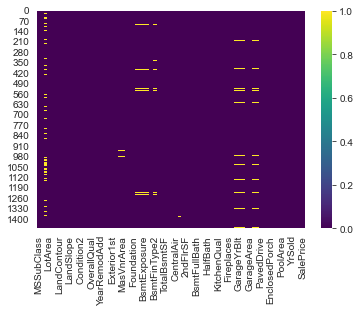

In [17]:
sns.heatmap(df.isnull(),cmap="viridis")

In [18]:
df["MasVnrType"]=df["MasVnrType"].fillna(df["MasVnrType"].mode()[0]) #kategorik
df["BsmtQual"]=df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])
df["BsmtCond"]=df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])
df["BsmtFinType1"]=df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0])
df["BsmtFinType2"]=df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0])
df["Electrical"]=df["Electrical"].fillna(df["Electrical"].mode()[0])
df["GarageType"]=df["GarageType"].fillna(df["GarageType"].mode()[0])
df["GarageFinish"]=df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])
df["GarageQual"]=df["GarageQual"].fillna(df["GarageQual"].mode()[0])
df["GarageCond"]=df["GarageCond"].fillna(df["GarageCond"].mode()[0])
df["MasVnrArea"]=df["MasVnrArea"].fillna(df["MasVnrArea"].mean()) # kategorik değil
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(df["GarageYrBlt"].mean())
df["BsmtExposure"]=df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0])

<AxesSubplot:>

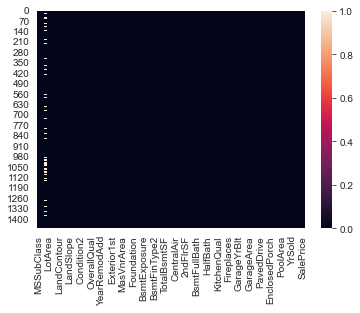

In [19]:
sns.heatmap(df.isnull())

In [20]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [21]:
df["LotFrontage"]=df["LotFrontage"].fillna(df["LotFrontage"].mean())

<AxesSubplot:>

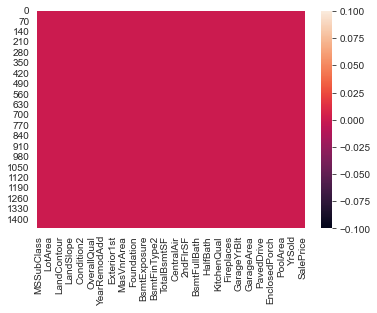

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [24]:
df.select_dtypes(["object"]).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
len(df.select_dtypes(["object"]).columns)

39

In [26]:
df["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [27]:
plural_dummies=pd.get_dummies(df[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']])

In [28]:
df=pd.concat([df.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],axis=1),plural_dummies],axis=1)

In [29]:
df.shape

(1460, 277)

In [30]:
df.corr()["SalePrice"]

MSSubClass              -0.084284
LotFrontage              0.334901
LotArea                  0.263843
OverallQual              0.790982
OverallCond             -0.077856
                           ...   
SaleCondition_AdjLand   -0.050686
SaleCondition_Alloca    -0.015525
SaleCondition_Family    -0.046480
SaleCondition_Normal    -0.153990
SaleCondition_Partial    0.352060
Name: SalePrice, Length: 277, dtype: float64

In [31]:
df.corr()["SalePrice"].sort_values()

ExterQual_TA       -0.589044
KitchenQual_TA     -0.519298
GarageFinish_Unf   -0.513906
BsmtQual_TA        -0.498545
FireplaceQu_QUNA   -0.471908
                      ...   
GarageArea          0.623431
GarageCars          0.640409
GrLivArea           0.708624
OverallQual         0.790982
SalePrice           1.000000
Name: SalePrice, Length: 277, dtype: float64

In [32]:
df.corr()["SalePrice"].sort_values().tail()

GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
SalePrice      1.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

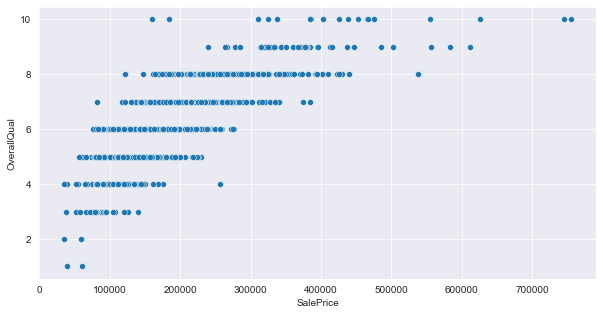

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="SalePrice",y="OverallQual",data=df)

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

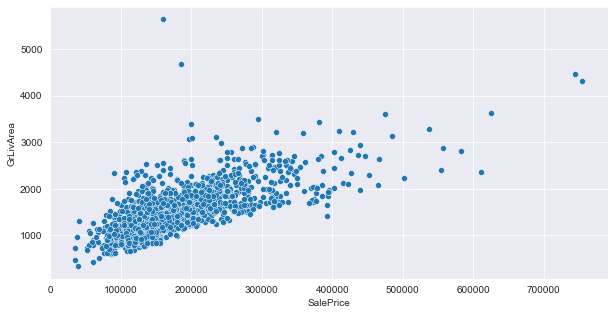

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="SalePrice",y="GrLivArea",data=df)

In [35]:
df.shape

(1460, 277)

In [36]:
df=df.loc[:,~df.columns.duplicated()] # bu kod tekrarlayan columnları siler "~" ise negatifini alır örneğin"True ise False False ise True Yapar."

In [37]:
df.shape

(1460, 277)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

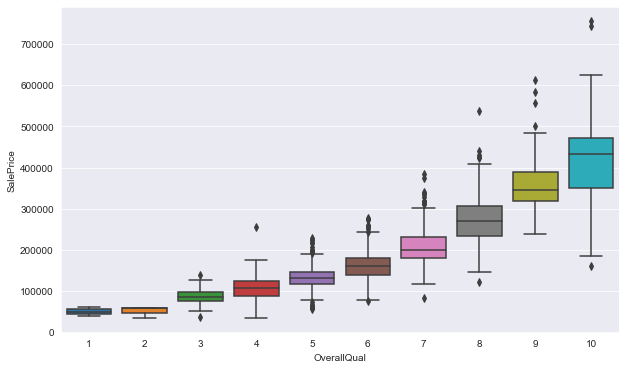

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x="OverallQual",y="SalePrice",data=df)

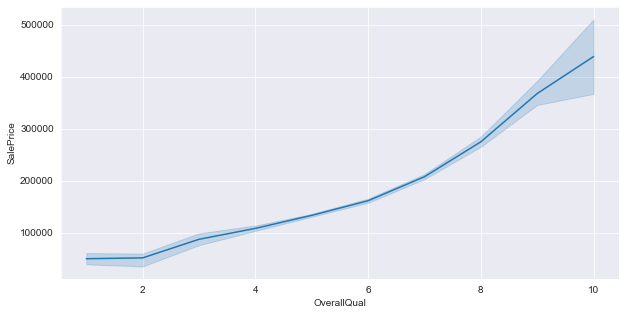

In [39]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = df, x = 'OverallQual', y = 'SalePrice')
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

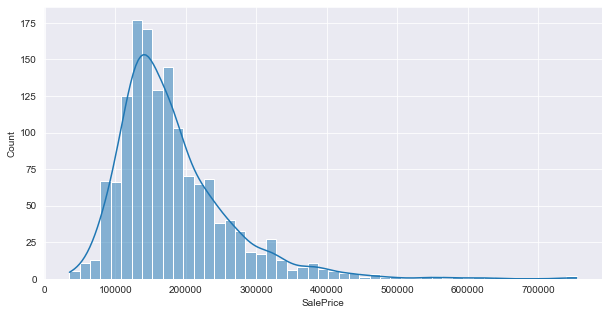

In [40]:
plt.figure(figsize = (10, 5))
sns.histplot(df['SalePrice'], kde =True)

In [41]:
X=df.drop("SalePrice",axis=1).values
y= df["SalePrice"].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [43]:
df.shape

(1460, 277)

In [44]:
df.corr()["SalePrice"].sort_values().tail(10)

TotRmsAbvGrd    0.533723
BsmtQual_Ex     0.553105
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [45]:
list(df.columns)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandS

In [46]:
new_df=df.filter([
"TotRmsAbvGrd",    
"BsmtQual_Ex",    
"FullBath",       
"1stFlrSF", 
"TotalBsmtSF", 
"GarageArea",      
"GarageCars",      
"GrLivArea",        
"OverallQual",     
"SalePrice"],axis=1)

In [47]:
new_df

,TotRmsAbvGrd,BsmtQual_Ex,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,8,0,2,856,856,548,2,1710,7,208500
1,6,0,2,1262,1262,460,2,1262,6,181500
2,6,0,2,920,920,608,2,1786,7,223500
3,7,0,1,961,756,642,3,1717,7,140000
4,9,0,2,1145,1145,836,3,2198,8,250000
...,...,...,...,...,...,...,...,...,...,...
1455,7,0,2,953,953,460,2,1647,6,175000
1456,7,0,2,2073,1542,500,2,2073,6,210000
1457,9,0,2,1188,1152,252,1,2340,7,266500
1458,5,0,1,1078,1078,240,1,1078,5,142125


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Random Forest

In [49]:
X=new_df.drop("SalePrice",axis=1).values
y=new_df["SalePrice"].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
rfc=RandomForestRegressor(n_estimators=100,random_state=42)

In [52]:
rfc.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [53]:
pred=rfc.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [55]:
rfc_expl=explained_variance_score(pred,y_test)

In [56]:
rfc_expl

0.8485209828295297

In [57]:
rfc.score(X_test,y_test)

0.883440105857938

In [58]:
pred

array([137785.        , 329193.8       , 131692.48333333, 174657.        ,
       329303.45      ,  74810.        , 186227.79      , 151986.95      ,
        74810.        , 127756.89      , 164585.95      , 123396.5       ,
       108225.        , 218411.6       , 181782.        , 122842.5       ,
       194633.        , 127229.25      , 135327.5       , 198164.4       ,
       160517.19      , 219413.09      , 170156.55      , 120957.5       ,
       197503.5       , 164509.8       , 183338.74333333, 103803.66      ,
       190579.        , 211796.06      , 130543.        , 236321.98      ,
       166719.37      , 107327.5       , 255811.53      , 139277.        ,
       160058.        , 202172.        , 309140.16      , 106730.83      ,
       133022.4125    , 225928.6       , 115387.5       , 392406.2       ,
       150694.6       , 181331.4       , 119355.        , 122488.09      ,
       412857.17      , 147985.52      , 121947.        , 192446.7       ,
       117464.0775    , 3

In [59]:
y_test

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

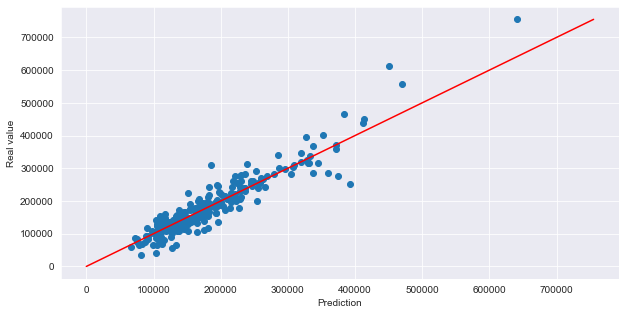

In [79]:
plt.figure(figsize=(10,5))
plt.scatter(pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()


In [82]:
print(mean_absolute_error(y_test,pred))

19573.70125075267


In [83]:
print(mean_squared_error(y_test,pred))

894052410.7448153


#### Linear Regression

In [64]:
lr=LinearRegression()

In [65]:
X=new_df.drop("SalePrice",axis=1).values
y=new_df["SalePrice"].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
lr.fit(X_train,y_train)

LinearRegression()

In [68]:
pred2=lr.predict(X_test)

In [69]:
lr.score(X_test,y_test)

0.8139332292881077

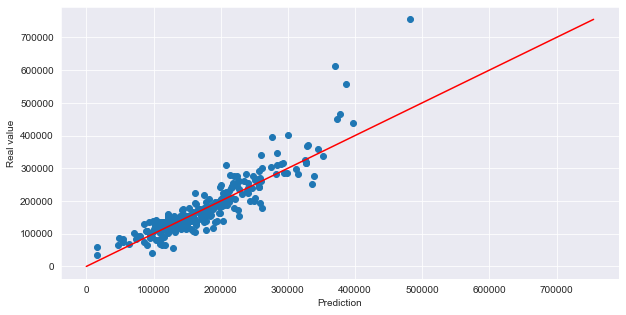

In [80]:
plt.figure(figsize=(10,5))
plt.scatter(pred2, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()
